In [47]:
#Imports 

import pandas as pd
import plotly as plotly


## EDA for the Chinese Grand Prix 2024 

In [48]:
df = pd.read_parquet("../data/laps/season=2024/round=05_laps.parquet")
df.head(5)

,season,round,race_id,circuit,total_laps,driver,team,driver_number,lap_number,lap_time_s,...,fresh_tyre,track_status,air_temp,track_temp,wind_speed,humidity,is_dnf,dnf_reason,classification_status,race_finished
0,2024,5,2024_05,Chinese Grand Prix,56,VER,Red Bull Racing,1,1,101.528000,...,1,1,18.639395,29.792727,1.68,66.060608,0,Finished,Finished,1
1,2024,5,2024_05,Chinese Grand Prix,56,VER,Red Bull Racing,1,2,100.102997,...,0,1,18.639395,29.792727,1.68,66.060608,0,Finished,Finished,1
2,2024,5,2024_05,Chinese Grand Prix,56,VER,Red Bull Racing,1,3,100.494003,...,0,1,18.639395,29.792727,1.68,66.060608,0,Finished,Finished,1
3,2024,5,2024_05,Chinese Grand Prix,56,VER,Red Bull Racing,1,4,100.572998,...,0,1,18.639395,29.792727,1.68,66.060608,0,Finished,Finished,1
4,2024,5,2024_05,Chinese Grand Prix,56,VER,Red Bull Racing,1,5,100.918999,...,0,1,18.639395,29.792727,1.68,66.060608,0,Finished,Finished,1


In [58]:
df.columns.unique()

Index(['season', 'round', 'race_id', 'circuit', 'total_laps', 'driver', 'team',
       'driver_number', 'lap_number', 'lap_time_s', 'sector1_time_s',
       'sector2_time_s', 'sector3_time_s', 'position', 'compound', 'tyre_life',
       'is_pit_out_lap', 'is_pit_in_lap', 'fresh_tyre', 'track_status',
       'air_temp', 'track_temp', 'wind_speed', 'humidity', 'is_dnf',
       'dnf_reason', 'classification_status', 'race_finished'],
      dtype='object')

In [50]:
df_race_results = df[['lap_number', 'driver', 'position']]

if df_race_results['lap_number'].eq(56).any():
    # Perform analysis on lap_number
    lap_56_data = df_race_results[df_race_results['lap_number'] == 56].copy()
    lap_56_data = lap_56_data.sort_values('position')
    
    # Position als Integer anzeigen (keine Dezimalstellen)
    lap_56_data['position'] = lap_56_data['position'].astype(int)

    # Saubere Ausgabe ohne Index
    print(lap_56_data.to_string(index=False))

 lap_number driver  position
         56    VER         1
         56    NOR         2
         56    PER         3
         56    LEC         4
         56    SAI         5
         56    RUS         6
         56    ALO         7
         56    PIA         8
         56    HAM         9
         56    HUL        10
         56    OCO        11
         56    ALB        12
         56    GAS        13
         56    ZHO        14
         56    MAG        15
         56    STR        16
         56    SAR        17


In [51]:
# 1. GRUNDLEGENDE DATENANALYSE
print(f"Dataset Shape: {df.shape}")
print(f"Anzahl Runden: {df['lap_number'].max()}")
print(f"Anzahl Fahrer: {df['driver'].nunique()}")
print(f"Fahrer: {sorted(df['driver'].unique())}")

print("\n MISSING VALUES ")
print(df.isnull().sum())

print("\n BASIC STATISTICS ")
print(df.describe())

Dataset Shape: (1032, 28)
Anzahl Runden: 56
Anzahl Fahrer: 20
Fahrer: ['ALB', 'ALO', 'BOT', 'GAS', 'HAM', 'HUL', 'LEC', 'MAG', 'NOR', 'OCO', 'PER', 'PIA', 'RIC', 'RUS', 'SAI', 'SAR', 'STR', 'TSU', 'VER', 'ZHO']

 MISSING VALUES 
season                    0
round                     0
race_id                   0
circuit                   0
total_laps                0
driver                    0
team                      0
driver_number             0
lap_number                0
lap_time_s               25
sector1_time_s           23
sector2_time_s            2
sector3_time_s            2
position                  2
compound                  0
tyre_life                 0
is_pit_out_lap            0
is_pit_in_lap             0
fresh_tyre                0
track_status              0
air_temp                  0
track_temp                0
wind_speed                0
humidity                  0
is_dnf                    0
dnf_reason                0
classification_status     0
race_finished  

In [52]:
# drivers that did not finish the race 

Retired_df = df[df['classification_status'] == 'Retired']
if not Retired_df.empty:
    # Entferne sich wiederholende Zeilen
    unique_retired = Retired_df[['driver', 'dnf_reason']].drop_duplicates()
    print(unique_retired.to_string(index=False))
else:
    print("Alle Fahrer haben das Rennen beendet")

driver dnf_reason
   TSU    Retired
   RIC    Retired
   BOT    Retired


In [53]:
# temp analysis 

df_temp = df[['driver', 'air_temp', 'track_temp']]

# Temperatur-Statistiken direkt anzeigen
df_temp[['air_temp', 'track_temp']].describe().round(1)


,air_temp,track_temp
count,1032.0,1032.0
mean,18.6,29.8
std,0.0,0.0
min,18.6,29.8
25%,18.6,29.8
50%,18.6,29.8
75%,18.6,29.8
max,18.6,29.8


In [64]:
# pitstop analysis

# Boxenstopp-Analyse - Prüfung der Datenwerte

# Prüfe verfügbare Boxenstopp-Spalten
pitstop_columns = [col for col in df.columns if 'pit' in col.lower()]
print("Verfügbare Boxenstopp-Spalten:", pitstop_columns)

# Prüfe die Werte in den Boxenstopp-Spalten
print("\n=== BOXENSTOPP-SPALTEN ANALYSE ===")
print("is_pit_out_lap Werte:", df['is_pit_out_lap'].value_counts())
print("is_pit_in_lap Werte:", df['is_pit_in_lap'].value_counts())

# Direkte Boxenstopp-Analyse
pit_out_laps = df[df['is_pit_out_lap'] == 1]  # Versuche mit 1 statt True
pit_in_laps = df[df['is_pit_in_lap'] == 1]

print(f"\nAnzahl Pit-Out Laps: {len(pit_out_laps)}")
print(f"Anzahl Pit-In Laps: {len(pit_in_laps)}")

if not pit_out_laps.empty:
    # Boxenstopps pro Fahrer
    stops_per_driver = pit_out_laps.groupby('driver').size().reset_index(name='anzahl_stops')
    stops_per_driver = stops_per_driver.sort_values('anzahl_stops', ascending=False)
    
    print("\n=== BOXENSTOPPS PRO FAHRER ===")
    print(stops_per_driver.to_string(index=False))
    
    # Timing der Boxenstopps
    pit_timing = pit_out_laps.groupby('driver')['lap_number'].agg(['min', 'max', 'mean']).round(1)
    pit_timing.columns = ['erster_stop', 'letzter_stop', 'avg_stop_runde']
    
    print("\n=== BOXENSTOPP TIMING ===")
    print(pit_timing.to_string())
else:
    print("\nKeine Boxenstopps gefunden - möglicherweise andere Codierung")

Verfügbare Boxenstopp-Spalten: ['is_pit_out_lap', 'is_pit_in_lap']

=== BOXENSTOPP-SPALTEN ANALYSE ===
is_pit_out_lap Werte: is_pit_out_lap
0    991
1     41
Name: count, dtype: int64
is_pit_in_lap Werte: is_pit_in_lap
0    991
1     41
Name: count, dtype: int64

Anzahl Pit-Out Laps: 41
Anzahl Pit-In Laps: 41

=== BOXENSTOPPS PRO FAHRER ===
driver  anzahl_stops
   STR             4
   ZHO             3
   ALO             3
   GAS             3
   SAR             3
   VER             2
   TSU             2
   RUS             2
   PIA             2
   ALB             2
   OCO             2
   MAG             2
   HUL             2
   HAM             2
   PER             2
   NOR             1
   RIC             1
   SAI             1
   LEC             1
   BOT             1

=== BOXENSTOPP TIMING ===
        erster_stop  letzter_stop  avg_stop_runde
driver                                           
ALB              10            24            17.0
ALO              12            44      

/var/folders/ms/pfkfg2zn4hx64rbdgcq_pq680000gn/T/ipykernel_59710/1174130617.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/ms/pfkfg2zn4hx64rbdgcq_pq680000gn/T/ipykernel_59710/1174130617.py:30: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [65]:
# Erweiterte Boxenstopp-Analyse 
# Reifenstrategie-Analyse mit verfügbaren Daten
compound_usage = df.groupby(['driver', 'compound']).size().unstack(fill_value=0)

print("=== REIFENSTRATEGIE PRO FAHRER ===")
compound_usage.head(10)

# Reifenalter-Analyse
print("\n=== REIFENALTER STATISTIKEN ===")
df[['tyre_life']].describe().round(1)

# Fresh Tyre Analysis
fresh_tyre_usage = df.groupby('driver')['fresh_tyre'].sum().reset_index()
fresh_tyre_usage.columns = ['driver', 'anzahl_fresh_tyres']
fresh_tyre_usage = fresh_tyre_usage.sort_values('anzahl_fresh_tyres', ascending=False)

print("\n=== FRESH TYRE USAGE ===")
fresh_tyre_usage.head(10)

=== REIFENSTRATEGIE PRO FAHRER ===

=== REIFENALTER STATISTIKEN ===

=== FRESH TYRE USAGE ===


/var/folders/ms/pfkfg2zn4hx64rbdgcq_pq680000gn/T/ipykernel_59710/4254301699.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/ms/pfkfg2zn4hx64rbdgcq_pq680000gn/T/ipykernel_59710/4254301699.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,driver,anzahl_fresh_tyres
19,ZHO,4
3,GAS,4
16,STR,4
1,ALO,4
9,OCO,3
18,VER,3
17,TSU,3
15,SAR,3
13,RUS,3
0,ALB,3


In [63]:
# Rundenzeit-Analyse mit verfügbaren Daten
print("=== RUNDENZEIT ANALYSE ===")
lap_time_stats = df.groupby('driver')['lap_time_s'].agg(['min', 'mean', 'max']).round(2)
lap_time_stats.columns = ['beste_zeit', 'avg_zeit', 'schlechteste_zeit']
lap_time_stats = lap_time_stats.sort_values('beste_zeit')

print("Beste Rundenzeiten pro Fahrer:")
lap_time_stats.head(10)

=== RUNDENZEIT ANALYSE ===
Beste Rundenzeiten pro Fahrer:


/var/folders/ms/pfkfg2zn4hx64rbdgcq_pq680000gn/T/ipykernel_59710/2061627269.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,beste_zeit,avg_zeit,schlechteste_zeit
driver,,,
ALO,97.809998,107.300003,148.539993
VER,98.410004,105.239998,148.770004
ZHO,98.629997,108.580002,147.059998
NOR,98.750000,107.440002,149.960007
GAS,99.199997,109.320000,149.899994
LEC,99.379997,106.019997,146.770004
PER,99.389999,105.900002,145.949997
STR,99.440002,105.800003,138.020004
PIA,99.739998,108.320000,149.000000


/var/folders/ms/pfkfg2zn4hx64rbdgcq_pq680000gn/T/ipykernel_59710/3374666992.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/ms/pfkfg2zn4hx64rbdgcq_pq680000gn/T/ipykernel_59710/3374666992.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



=== BOXENSTOPPS PRO FAHRER ===
driver  anzahl_stops
   STR             4
   ZHO             3
   ALO             3
   GAS             3
   SAR             3
   VER             2
   TSU             2
   RUS             2
   PIA             2
   ALB             2
   OCO             2
   MAG             2
   HUL             2
   HAM             2
   PER             2
   NOR             1
   RIC             1
   SAI             1
   LEC             1
   BOT             1

=== BOXENSTOPP TIMING ===
        erster_stop  letzter_stop  avg_stop_runde
driver                                           
ALB              10            24            17.0
ALO              12            44            26.7
BOT              10            10            10.0
GAS              12            39            25.0
HAM              10            22            16.0
HUL               9            24            16.5
LEC              22            22            22.0
MAG              18            28            23.0
N

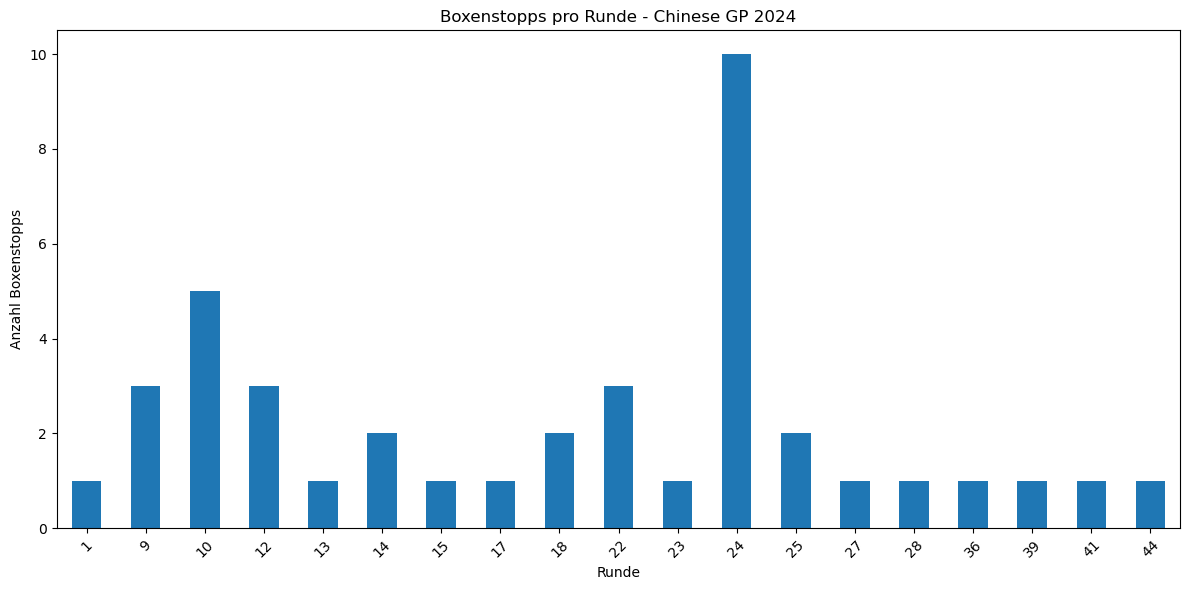

In [66]:
# Korrigierte Boxenstopp-Analyse mit den verfügbaren Spalten
import matplotlib.pyplot as plt
import plotly.express as px

# Direkte Boxenstopp-Analyse mit is_pit_out_lap und is_pit_in_lap
pit_out_laps = df[df['is_pit_out_lap'] == True]
pit_in_laps = df[df['is_pit_in_lap'] == True]

if not pit_out_laps.empty:
    # Boxenstopps pro Fahrer
    stops_per_driver = pit_out_laps.groupby('driver').size().reset_index(name='anzahl_stops')
    stops_per_driver = stops_per_driver.sort_values('anzahl_stops', ascending=False)
    
    print("=== BOXENSTOPPS PRO FAHRER ===")
    print(stops_per_driver.to_string(index=False))
    
    # Timing der Boxenstopps
    pit_timing = pit_out_laps.groupby('driver')['lap_number'].agg(['min', 'max', 'mean']).round(1)
    pit_timing.columns = ['erster_stop', 'letzter_stop', 'avg_stop_runde']
    
    print("\n=== BOXENSTOPP TIMING ===")
    print(pit_timing.head(10).to_string())
    
    # Visualisierung der Boxenstopp-Runden
    plt.figure(figsize=(12, 6))
    pit_rounds = pit_out_laps['lap_number'].value_counts().sort_index()
    pit_rounds.plot(kind='bar')
    plt.title('Boxenstopps pro Runde - Chinese GP 2024')
    plt.xlabel('Runde')
    plt.ylabel('Anzahl Boxenstopps')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Keine Boxenstopps gefunden")